<style>
    h1 {
        color: #001f3d;
        font-size: 28px;
        font-weight: bold;
        text-align: center;
    }
    h2 {
        color: #001f3d;
        font-size: 22px;
        font-weight: bold;
    }
    p {
        font-size: 16px;
        line-height: 1.6;
        color: #333;
    }
    ul {
        font-size: 16px;
        color: #333;
    }
    li {
        margin-bottom: 10px;
    }
</style>

# Exploring Monthly Sales Trends from Different Food Outlets

In this notebook, we will analyze trends in consumer spending across various food outlets (such as **grocery stores**, **supermarkets**, and **restaurants**) using the `monthly_sales_by_outlet` dataset. We aim to understand how spending patterns differ across outlets and explore how these trends might be related to changes in food expenditures.

---

## 1. **Loading the Dataset**

We will start by loading the `monthly_sales_by_outlet` dataset and inspecting its structure to ensure we understand the types of data we are working with.

```python
# Load the dataset
df_sales = pd.read_csv('monthly_sales_by_outlet.csv')

# Inspect the first few rows
df_sales.head()

# Check for missing values and data types
df_sales.info()


In [115]:
import pandas as pd

# Load the dataset
df_sales= pd.read_csv('monthly_sales by outlet.csv')

# Display the first few rows to understand the structure
df_sales.head()

,Year,Month,Grocery stores sales million nominal U.S. dollars with taxes and tips,Warehouse clubs and supercenters sales million nominal U.S. dollars with taxes and tips,Other food at home sales million nominal U.S. dollars with taxes and tips,Total food at home sales million nominal U.S. dollars with taxes and tips,Full-service restaurants sales million nominal U.S. dollars with taxes and tips,Limited-service restaurants sales million nominal U.S. dollars with taxes and tips,Other food away from home sales million nominal U.S. dollars with taxes and tips,Total food away from home sales million nominal U.S. dollars with taxes and tips,Total nominal U.S. dollars food sales with taxes and tips,Grocery stores sales million constant 1988 U.S. dollars with taxes and tips,Warehouse clubs and supercenters sales million constant 1988 U.S. dollars with taxes and tips,Other food at home sales million constant 1988 U.S. dollars with taxes and tips,Total food at home sales million constant 1988 U.S. dollars with taxes and tips,Full-service restaurants sales million constant 1988 U.S. dollars with taxes and tips,Limited-service restaurants sales million constant 1988 U.S. dollars with taxes and tips,Other food away from home sales million constant 1988 U.S. dollars with taxes and tips,Total food away from home sales million constant 1988 U.S. dollars with taxes and tips,Total food sales million constant 1988 U.S. dollars with taxes and tips
0,2023,December,"51,628.40","25,028.96","23,271.16","99,928.52","47,406.62","44,485.76","24,644.93","116,537.31","216,465.83","19,867.56","9,632.17","8,955.63","38,455.36","15,974.15","14,989.14","8,303.80","39,267.09","77,722.45"
1,2023,November,"49,031.77","21,150.10","21,920.28","92,102.15","41,488.79","41,899.89","23,859.01","107,247.69","199,349.84","18,854.70","8,133.55","8,429.70","35,417.95","14,025.89","14,164.12","8,065.38","36,255.39","71,673.34"
2,2023,October,"47,988.36","20,387.58","21,020.88","89,396.82","43,013.04","44,108.90","24,378.39","111,500.33","200,897.16","18,358.77","7,800.08","8,042.36","34,201.21","14,604.36","14,975.65","8,276.76","37,856.77","72,057.98"
3,2023,September,"47,388.03","19,592.93","20,191.41","87,172.37","42,467.24","43,547.86","24,338.93","110,354.03","197,526.41","18,180.59","7,517.34","7,746.95","33,444.88","14,472.93","14,840.42","8,294.25","37,607.60","71,052.48"
4,2023,August,"48,744.54","21,026.62","21,004.37","90,775.52","43,636.95","45,221.39","24,681.41","113,539.74","204,315.27","18,713.88","8,072.96","8,064.40","34,851.25","14,930.25","15,471.54","8,444.14","38,845.93","73,697.17"


In [116]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 20 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Year                                                                                           324 non-null    int64 
 1   Month                                                                                          324 non-null    object
 2   Grocery stores sales million nominal U.S. dollars with taxes and tips                          324 non-null    object
 3   Warehouse clubs and supercenters sales million nominal U.S. dollars with taxes and tips        324 non-null    object
 4   Other food at home sales million nominal U.S. dollars with taxes and tips                      324 non-null    object
 5   Total food at home sales mill

In [117]:
len(df_sales)

324

In [118]:
# Clean the sales data (remove commas and convert to numeric)
def clean_sales_column(col):
    return pd.to_numeric(df_sales[col].replace({',': ''}, regex=True), errors='coerce')

# Apply cleaning function to relevant columns
columns_to_clean_sales = [
    'Grocery stores sales million nominal U.S. dollars with taxes and tips',
    'Warehouse clubs and supercenters sales million nominal U.S. dollars with taxes and tips',
    'Other food at home sales million nominal U.S. dollars with taxes and tips',
    'Total food at home sales million nominal U.S. dollars with taxes and tips',
    'Full-service restaurants sales million nominal U.S. dollars with taxes and tips',
    'Limited-service restaurants sales million nominal U.S. dollars with taxes and tips',
    'Other food away from home sales million nominal U.S. dollars with taxes and tips',
    'Total food away from home sales million nominal U.S. dollars with taxes and tips',
    'Total nominal U.S. dollars food sales with taxes and tips'
]

for column in columns_to_clean_sales:
    df_sales[column] = clean_sales_column(column)

# Verify the cleaning was successful
df_sales.head()


,Year,Month,Grocery stores sales million nominal U.S. dollars with taxes and tips,Warehouse clubs and supercenters sales million nominal U.S. dollars with taxes and tips,Other food at home sales million nominal U.S. dollars with taxes and tips,Total food at home sales million nominal U.S. dollars with taxes and tips,Full-service restaurants sales million nominal U.S. dollars with taxes and tips,Limited-service restaurants sales million nominal U.S. dollars with taxes and tips,Other food away from home sales million nominal U.S. dollars with taxes and tips,Total food away from home sales million nominal U.S. dollars with taxes and tips,Total nominal U.S. dollars food sales with taxes and tips,Grocery stores sales million constant 1988 U.S. dollars with taxes and tips,Warehouse clubs and supercenters sales million constant 1988 U.S. dollars with taxes and tips,Other food at home sales million constant 1988 U.S. dollars with taxes and tips,Total food at home sales million constant 1988 U.S. dollars with taxes and tips,Full-service restaurants sales million constant 1988 U.S. dollars with taxes and tips,Limited-service restaurants sales million constant 1988 U.S. dollars with taxes and tips,Other food away from home sales million constant 1988 U.S. dollars with taxes and tips,Total food away from home sales million constant 1988 U.S. dollars with taxes and tips,Total food sales million constant 1988 U.S. dollars with taxes and tips
0,2023,December,51628.40,25028.96,23271.16,99928.52,47406.62,44485.76,24644.93,116537.31,216465.83,"19,867.56","9,632.17","8,955.63","38,455.36","15,974.15","14,989.14","8,303.80","39,267.09","77,722.45"
1,2023,November,49031.77,21150.10,21920.28,92102.15,41488.79,41899.89,23859.01,107247.69,199349.84,"18,854.70","8,133.55","8,429.70","35,417.95","14,025.89","14,164.12","8,065.38","36,255.39","71,673.34"
2,2023,October,47988.36,20387.58,21020.88,89396.82,43013.04,44108.90,24378.39,111500.33,200897.16,"18,358.77","7,800.08","8,042.36","34,201.21","14,604.36","14,975.65","8,276.76","37,856.77","72,057.98"
3,2023,September,47388.03,19592.93,20191.41,87172.37,42467.24,43547.86,24338.93,110354.03,197526.41,"18,180.59","7,517.34","7,746.95","33,444.88","14,472.93","14,840.42","8,294.25","37,607.60","71,052.48"
4,2023,August,48744.54,21026.62,21004.37,90775.52,43636.95,45221.39,24681.41,113539.74,204315.27,"18,713.88","8,072.96","8,064.40","34,851.25","14,930.25","15,471.54","8,444.14","38,845.93","73,697.17"


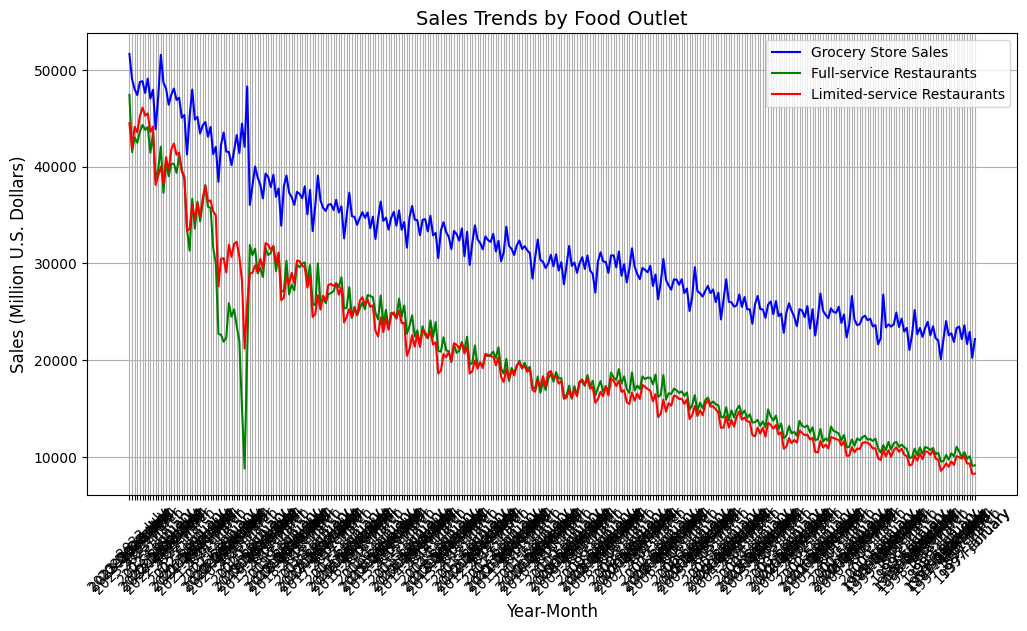

In [119]:
# Create a new column 'Year-Month' to combine Year and Month for better plotting
df_sales['YearMonth'] = df_sales['Year'].astype(str) + '-' + df_sales['Month']

# Plot sales trends for different outlets
plt.figure(figsize=(12, 6))

# Plot Grocery Store Sales
plt.plot(df_sales['YearMonth'], df_sales['Grocery stores sales million nominal U.S. dollars with taxes and tips'], label='Grocery Store Sales', color='blue')

# Plot Restaurant Sales (Full-service + Limited-service)
plt.plot(df_sales['YearMonth'], df_sales['Full-service restaurants sales million nominal U.S. dollars with taxes and tips'], label='Full-service Restaurants', color='green')
plt.plot(df_sales['YearMonth'], df_sales['Limited-service restaurants sales million nominal U.S. dollars with taxes and tips'], label='Limited-service Restaurants', color='red')

# Add titles and labels
plt.title('Sales Trends by Food Outlet', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Sales (Million U.S. Dollars)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


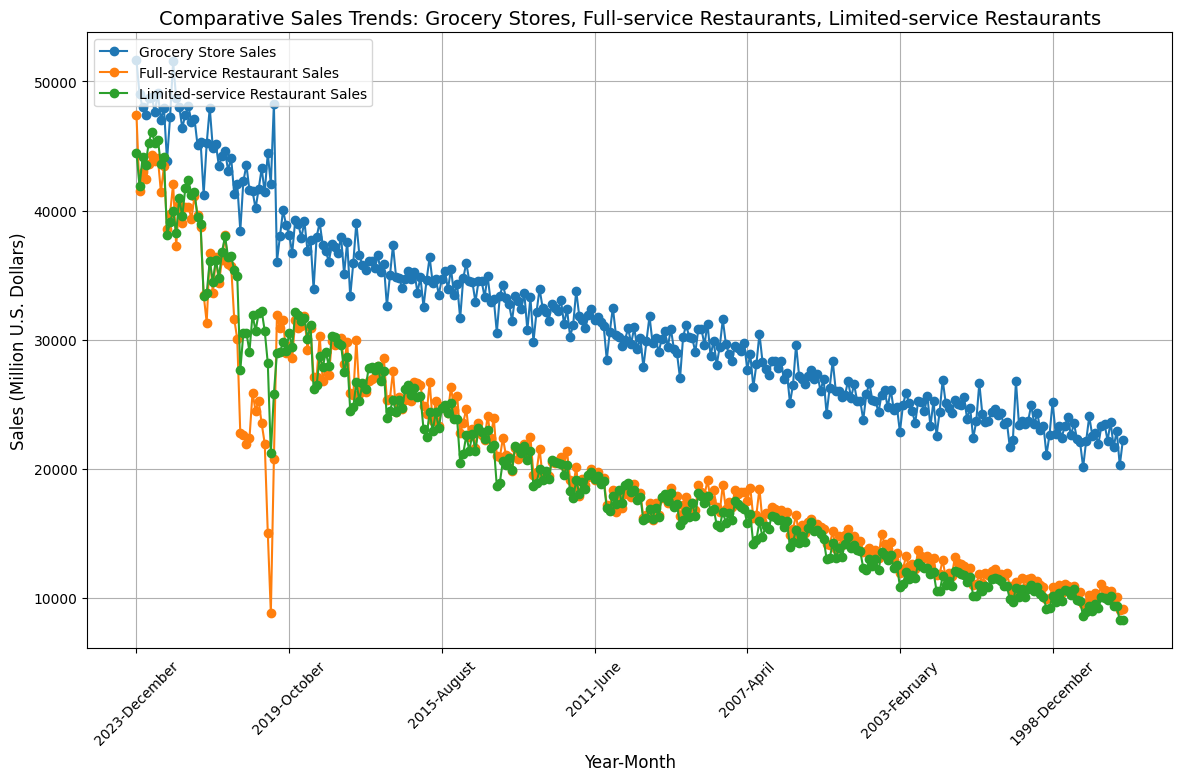

In [120]:
# Create a comparison dataframe for easier analysis
comparison_sales_df = pd.DataFrame({
    'YearMonth': df_sales['YearMonth'],
    'Grocery Store Sales': df_sales['Grocery stores sales million nominal U.S. dollars with taxes and tips'],
    'Full-service Restaurant Sales': df_sales['Full-service restaurants sales million nominal U.S. dollars with taxes and tips'],
    'Limited-service Restaurant Sales': df_sales['Limited-service restaurants sales million nominal U.S. dollars with taxes and tips']
})

# Plot comparative analysis for sales
comparison_sales_df.set_index('YearMonth').plot(figsize=(14, 8), marker='o')
plt.title('Comparative Sales Trends: Grocery Stores, Full-service Restaurants, Limited-service Restaurants', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Sales (Million U.S. Dollars)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


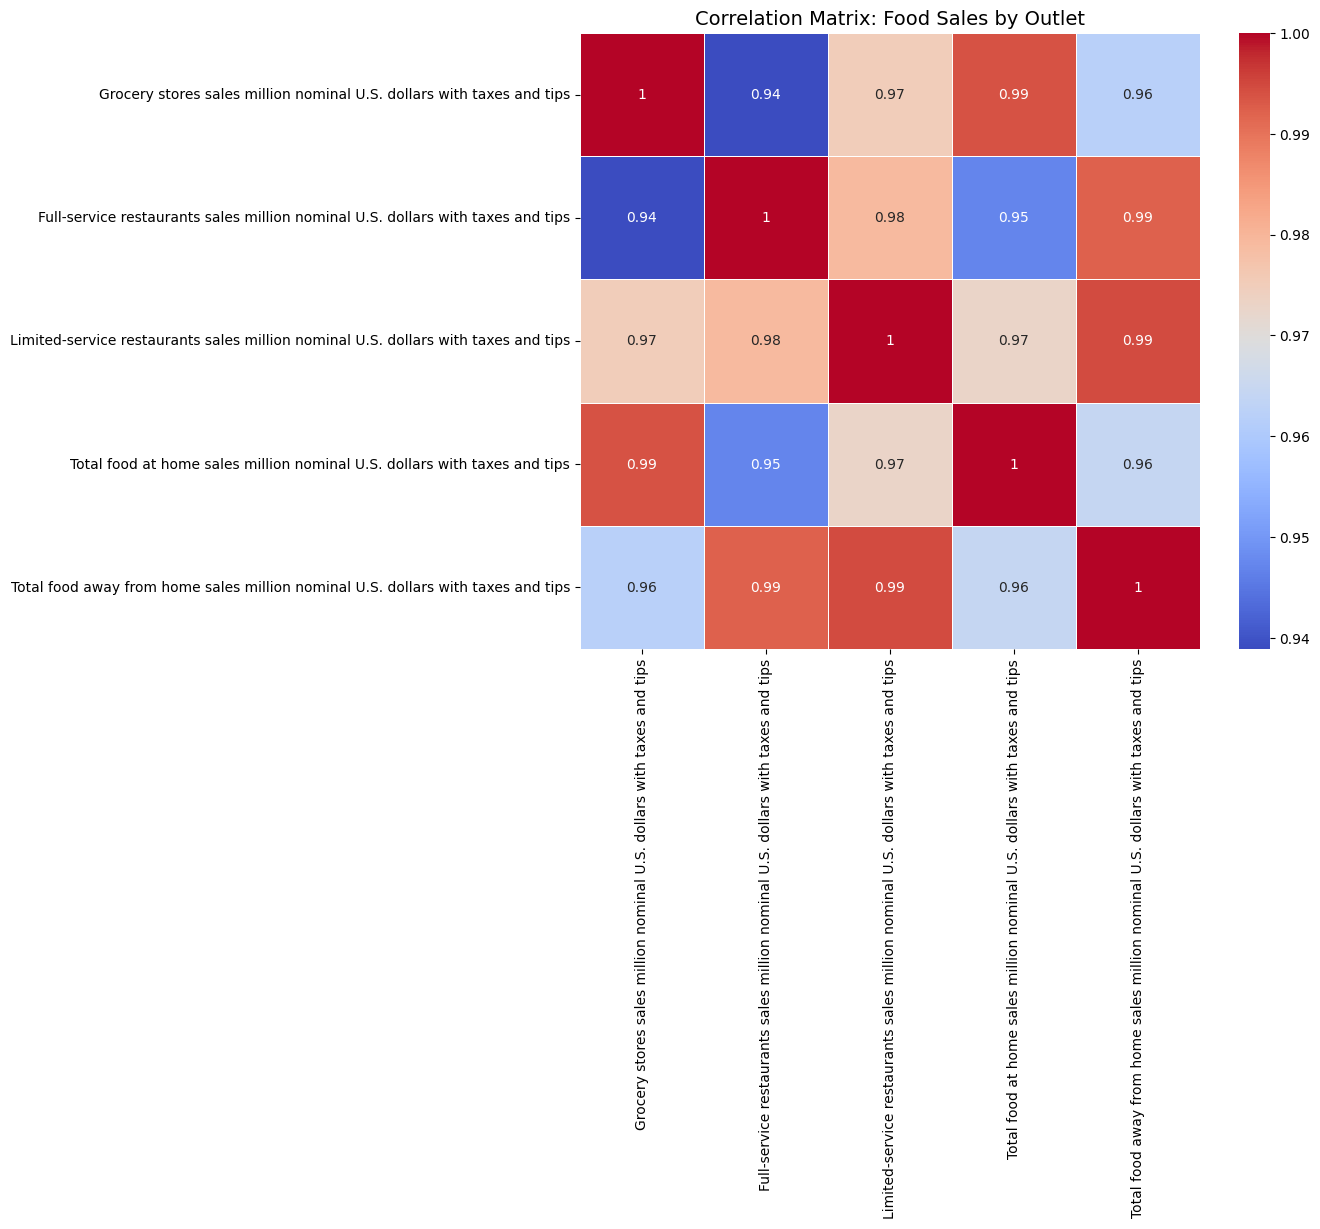

In [121]:
import seaborn as sns
# Calculate the correlation matrix for the outlet sales
corr_sales = df_sales[['Grocery stores sales million nominal U.S. dollars with taxes and tips',
                       'Full-service restaurants sales million nominal U.S. dollars with taxes and tips',
                       'Limited-service restaurants sales million nominal U.S. dollars with taxes and tips',
                       'Total food at home sales million nominal U.S. dollars with taxes and tips',
                       'Total food away from home sales million nominal U.S. dollars with taxes and tips']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_sales, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Food Sales by Outlet', fontsize=14)
plt.show()


In [122]:

# Creating the DataFrame
df = df_sales


# Clean the 'Month' column to ensure it has the correct format (in case of extra spaces)
df['Month'] = df['Month'].str.strip()

# Map the full month names to the abbreviated form (e.g., January -> Jan, February -> Feb)
month_map = {
    'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr', 'May': 'May',
    'June': 'Jun', 'July': 'Jul', 'August': 'Aug', 'September': 'Sep', 'October': 'Oct',
    'November': 'Nov', 'December': 'Dec'
}

df['Month'] = df['Month'].map(month_map)

# Combine 'Year' and 'Month' into a valid date string and convert to datetime
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')

# Check the resulting dataframe and the 'Date' column
print(df)


     Year Month  \
0    2023   Dec   
1    2023   Nov   
2    2023   Oct   
3    2023   Sep   
4    2023   Aug   
..    ...   ...   
319  1997   May   
320  1997   Apr   
321  1997   Mar   
322  1997   Feb   
323  1997   Jan   

     Grocery stores sales million nominal U.S. dollars with taxes and tips  \
0                                             51628.40                       
1                                             49031.77                       
2                                             47988.36                       
3                                             47388.03                       
4                                             48744.54                       
..                                                 ...                       
319                                           23613.38                       
320                                           21674.88                       
321                                           22932.37               

In [123]:
df

,Year,Month,Grocery stores sales million nominal U.S. dollars with taxes and tips,Warehouse clubs and supercenters sales million nominal U.S. dollars with taxes and tips,Other food at home sales million nominal U.S. dollars with taxes and tips,Total food at home sales million nominal U.S. dollars with taxes and tips,Full-service restaurants sales million nominal U.S. dollars with taxes and tips,Limited-service restaurants sales million nominal U.S. dollars with taxes and tips,Other food away from home sales million nominal U.S. dollars with taxes and tips,Total food away from home sales million nominal U.S. dollars with taxes and tips,...,Warehouse clubs and supercenters sales million constant 1988 U.S. dollars with taxes and tips,Other food at home sales million constant 1988 U.S. dollars with taxes and tips,Total food at home sales million constant 1988 U.S. dollars with taxes and tips,Full-service restaurants sales million constant 1988 U.S. dollars with taxes and tips,Limited-service restaurants sales million constant 1988 U.S. dollars with taxes and tips,Other food away from home sales million constant 1988 U.S. dollars with taxes and tips,Total food away from home sales million constant 1988 U.S. dollars with taxes and tips,Total food sales million constant 1988 U.S. dollars with taxes and tips,YearMonth,Date
0,2023,Dec,51628.40,25028.96,23271.16,99928.52,47406.62,44485.76,24644.93,116537.31,...,"9,632.17","8,955.63","38,455.36","15,974.15","14,989.14","8,303.80","39,267.09","77,722.45",2023-December,2023-12-01
1,2023,Nov,49031.77,21150.10,21920.28,92102.15,41488.79,41899.89,23859.01,107247.69,...,"8,133.55","8,429.70","35,417.95","14,025.89","14,164.12","8,065.38","36,255.39","71,673.34",2023-November,2023-11-01
2,2023,Oct,47988.36,20387.58,21020.88,89396.82,43013.04,44108.90,24378.39,111500.33,...,"7,800.08","8,042.36","34,201.21","14,604.36","14,975.65","8,276.76","37,856.77","72,057.98",2023-October,2023-10-01
3,2023,Sep,47388.03,19592.93,20191.41,87172.37,42467.24,43547.86,24338.93,110354.03,...,"7,517.34","7,746.95","33,444.88","14,472.93","14,840.42","8,294.25","37,607.60","71,052.48",2023-September,2023-09-01
4,2023,Aug,48744.54,21026.62,21004.37,90775.52,43636.95,45221.39,24681.41,113539.74,...,"8,072.96","8,064.40","34,851.25","14,930.25","15,471.54","8,444.14","38,845.93","73,697.17",2023-August,2023-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1997,May,23613.38,2519.27,6194.41,32327.06,10509.64,10112.04,4502.22,25123.90,...,"1,862.78","4,591.16","23,940.66","8,191.35","7,881.17","3,509.20","19,581.72","43,522.38",1997-May,1997-05-01
320,1997,Apr,21674.88,2243.47,5956.79,29875.14,9831.41,9332.29,4256.56,23420.26,...,"1,659.43","4,414.22","22,124.82","7,667.63","7,278.10","3,319.84","18,265.57","40,390.39",1997-April,1997-04-01
321,1997,Mar,22932.37,2307.94,6202.18,31442.48,10093.29,9340.53,4211.67,23645.48,...,"1,695.07","4,600.11","23,256.03","7,881.97","7,293.87","3,289.04","18,464.87","41,720.90",1997-March,1997-03-01
322,1997,Feb,20259.81,1985.36,5783.92,28029.09,9094.30,8255.88,3968.89,21319.07,...,"1,475.41","4,271.72","20,731.36","7,120.10","6,463.46","3,107.40","16,690.96","37,422.31",1997-February,1997-02-01


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 22 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   Year                                                                                           324 non-null    int64         
 1   Month                                                                                          324 non-null    object        
 2   Grocery stores sales million nominal U.S. dollars with taxes and tips                          324 non-null    float64       
 3   Warehouse clubs and supercenters sales million nominal U.S. dollars with taxes and tips        324 non-null    float64       
 4   Other food at home sales million nominal U.S. dollars with taxes and tips                      324 non-n

In [125]:
# Select relevant columns for ARIMA
df_arima = df[['Date', 'Total nominal U.S. dollars food sales with taxes and tips']].copy()

# Set the 'Date' column as the index
df_arima.set_index('Date', inplace=True)

# Ensure the index is sorted (necessary for time series)
df_arima.sort_index(inplace=True)

# Reset the frequency (set monthly frequency 'MS' for month start)
# This ensures that the time series has a regular interval (monthly in this case)
df_arima = df_arima.asfreq('MS')

# Check for missing values and fill or drop if necessary
# It's a good practice to handle missing data in time series before model fitting
if df_arima.isnull().any().any():
    df_arima.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Display the prepared dataframe info
print(df_arima.info())

# Show a sample of the data
print(df_arima.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1997-01-01 to 2023-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Total nominal U.S. dollars food sales with taxes and tips  324 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB
None
            Total nominal U.S. dollars food sales with taxes and tips
Date                                                                 
1997-01-01                                           51663.27        
1997-02-01                                           49348.16        
1997-03-01                                           55087.97        
1997-04-01                                           53295.39        
1997-05-01                                           57450.97        


In [126]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1997-01-01 to 2023-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Total nominal U.S. dollars food sales with taxes and tips  324 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


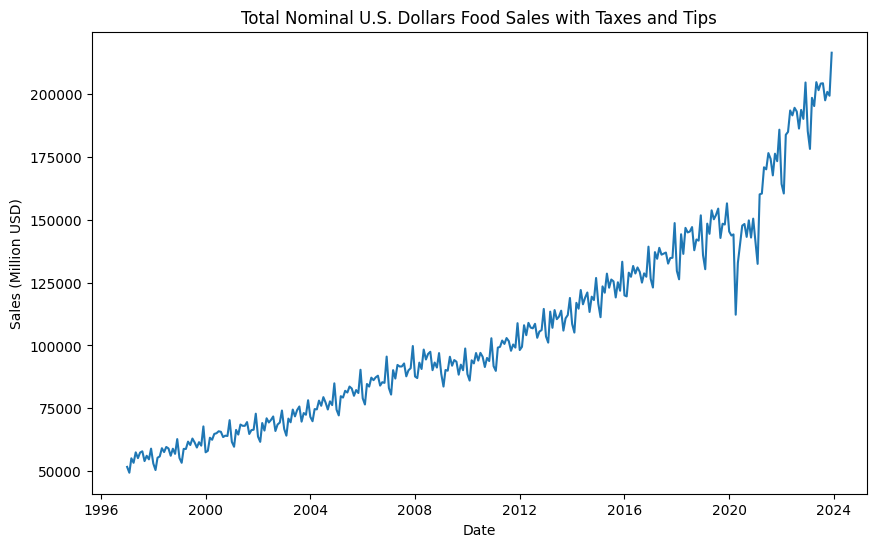

In [127]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df_arima)
plt.title("Total Nominal U.S. Dollars Food Sales with Taxes and Tips")
plt.xlabel("Date")
plt.ylabel("Sales (Million USD)")
plt.show()


In [128]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(df_arima['Total nominal U.S. dollars food sales with taxes and tips'])
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

# If p-value is small (typically < 0.05), the series is stationary


ADF Statistic: 1.8270934811700388
p-value: 0.9984012657151001


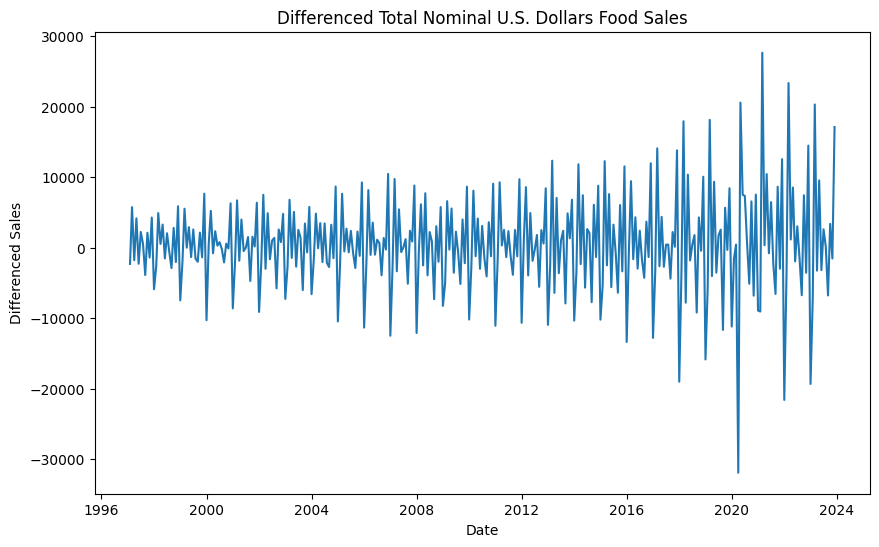

ADF Statistic (Differenced Data): -3.8039499534925247
p-value (Differenced Data): 0.0028671593641521735


In [129]:
# Difference the data (subtract previous month from the current one)
df_arima_diff = df_arima.diff().dropna()

# Plot the differenced data to visualize
plt.figure(figsize=(10, 6))
plt.plot(df_arima_diff)
plt.title("Differenced Total Nominal U.S. Dollars Food Sales")
plt.xlabel("Date")
plt.ylabel("Differenced Sales")
plt.show()

# Perform Augmented Dickey-Fuller test again on the differenced data
adf_test_diff = adfuller(df_arima_diff['Total nominal U.S. dollars food sales with taxes and tips'])
print("ADF Statistic (Differenced Data):", adf_test_diff[0])
print("p-value (Differenced Data):", adf_test_diff[1])


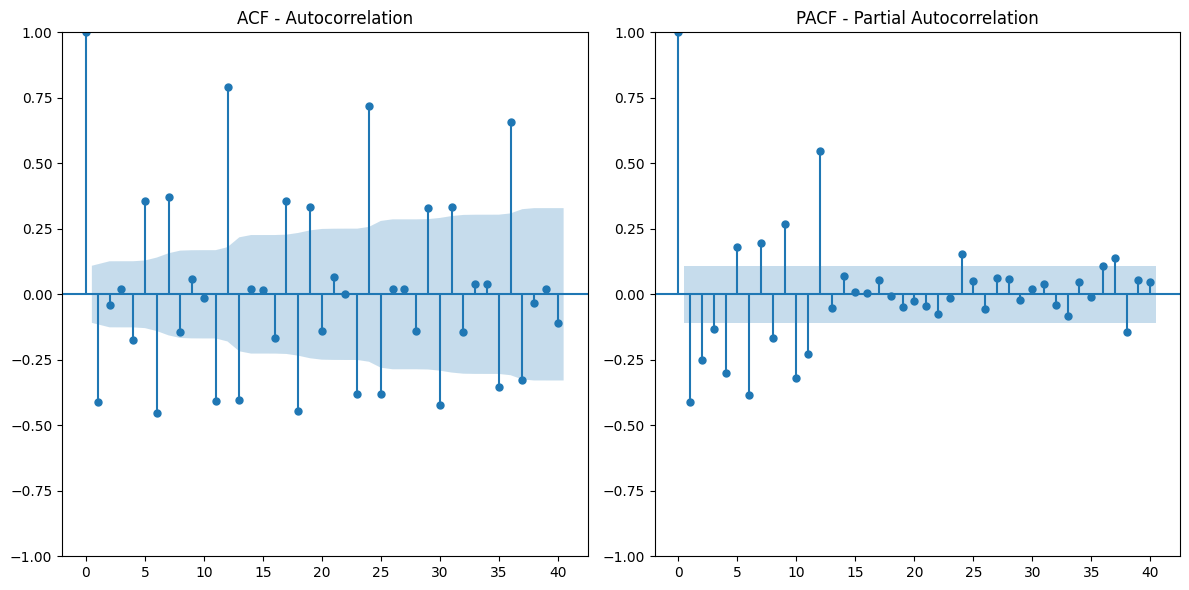

In [130]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(121)
plot_acf(df_arima_diff, ax=plt.gca(), lags=40)
plt.title("ACF - Autocorrelation")

# PACF Plot
plt.subplot(122)
plot_pacf(df_arima_diff, ax=plt.gca(), lags=40)
plt.title("PACF - Partial Autocorrelation")

plt.tight_layout()
plt.show()


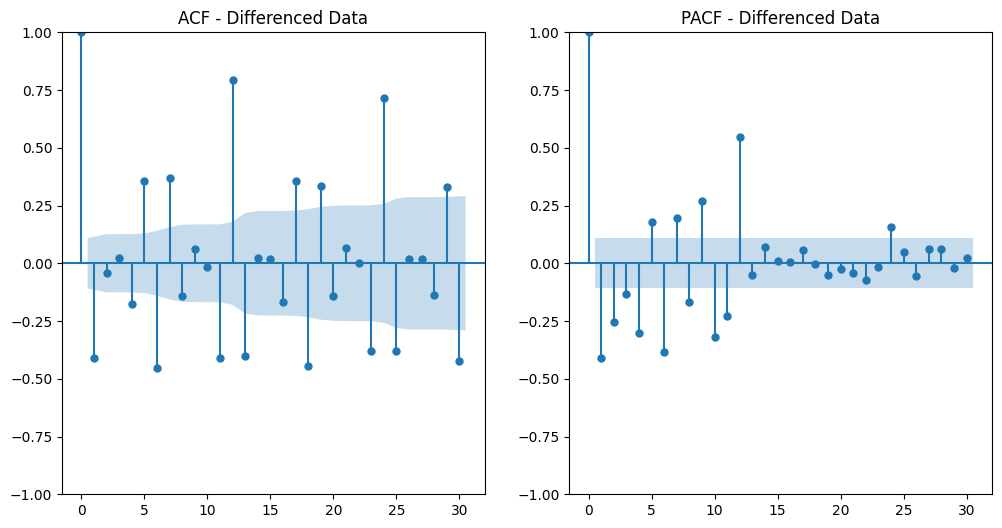

                                                   SARIMAX Results                                                   
Dep. Variable:     Total nominal U.S. dollars food sales with taxes and tips   No. Observations:                  324
Model:                                                        ARIMA(1, 1, 1)   Log Likelihood               -3273.279
Date:                                                       Fri, 21 Feb 2025   AIC                           6552.558
Time:                                                               22:53:23   BIC                           6563.891
Sample:                                                           01-01-1997   HQIC                          6557.082
                                                                - 12-01-2023                                         
Covariance Type:                                                         opg                                         
                 coef    std err          z      P>|z|  

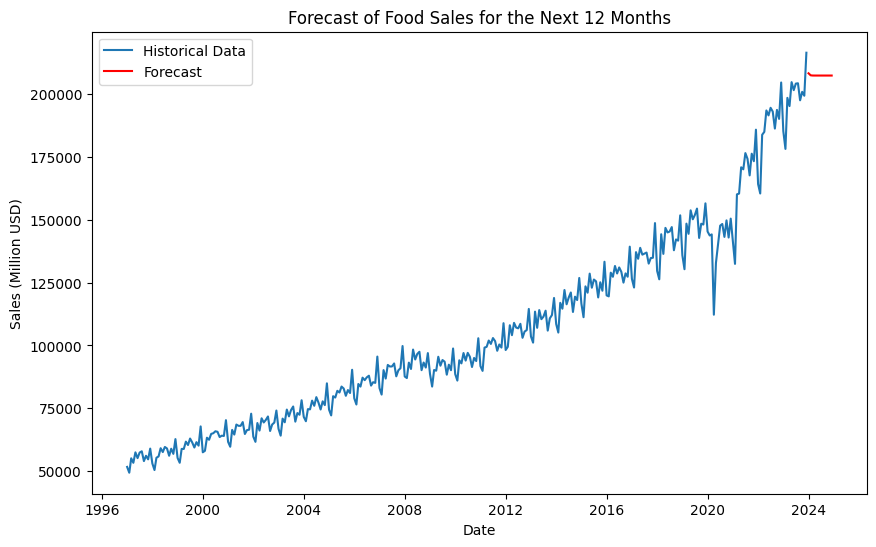

Mean Squared Error on Test Set: 1129211739.1660202


In [131]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Assuming the DataFrame 'df_arima' is already prepared and stationary

# Step 1: Differencing to make the data stationary
# Here, we have already checked that differencing once is sufficient (d=1).
df_arima_diff = df_arima.diff().dropna()

# Step 2: Plot ACF and PACF for differenced data to select AR(p) and MA(q)
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(121)
plot_acf(df_arima_diff, lags=30, ax=plt.gca())
plt.title('ACF - Differenced Data')

# PACF plot
plt.subplot(122)
plot_pacf(df_arima_diff, lags=30, ax=plt.gca())
plt.title('PACF - Differenced Data')

plt.show()

# Step 3: Fit ARIMA model (use AR(1), I(1), MA(1) based on ACF/PACF)
# Select ARIMA model parameters p, d, q. Based on ACF/PACF, let's try ARIMA(1, 1, 1)
model = ARIMA(df_arima, order=(1, 1, 1))
model_fit = model.fit()

# Step 4: Summary of the model
print(model_fit.summary())

# Step 5: Making predictions
# Forecasting the next 12 months (1 year ahead)
forecast = model_fit.forecast(steps=12)
print("Forecasted Values for the Next 12 Months:")
print(forecast)

# Step 6: Visualizing the predictions
plt.figure(figsize=(10, 6))

# Plotting historical data
plt.plot(df_arima.index, df_arima, label='Historical Data')

# Plotting forecasted data
forecast_index = pd.date_range(df_arima.index[-1], periods=13, freq='MS')[1:]
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title('Forecast of Food Sales for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales (Million USD)')
plt.legend()
plt.show()

# Step 7: Evaluating the model (if test data is available)
# If you have test data, you can calculate the MSE or RMSE.
# Let's use the first 5 years of data for training and the remaining for testing (if available).

# Train-test split (for example, if we split 80-20%)
train_size = int(len(df_arima) * 0.8)
train, test = df_arima[:train_size], df_arima[train_size:]

# Fit ARIMA model on train data
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on test data
forecast_test = model_fit.forecast(steps=len(test))

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(test, forecast_test)
print(f'Mean Squared Error on Test Set: {mse}')



In [132]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Sort the dataframe by the 'Date' column
df = df.sort_values(by='Date')


# Convert object columns to numeric (force errors to NaN)
columns_to_convert = [
    'Grocery stores sales million constant 1988 U.S. dollars with taxes and tips',
    'Warehouse clubs and supercenters sales million constant 1988 U.S. dollars with taxes and tips',
    'Other food at home sales million constant 1988 U.S. dollars with taxes and tips',
    'Total food at home sales million constant 1988 U.S. dollars with taxes and tips',
    'Full-service restaurants sales million constant 1988 U.S. dollars with taxes and tips',
    'Limited-service restaurants sales million constant 1988 U.S. dollars with taxes and tips',
    'Other food away from home sales million constant 1988 U.S. dollars with taxes and tips',
    'Total food away from home sales million constant 1988 U.S. dollars with taxes and tips',
    'Total food sales million constant 1988 U.S. dollars with taxes and tips'
]

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Create lag features for the target column
def create_lag_features(df, column, lags=3):  # Reduced lags to 3
    df_lags = df.copy()
    for lag in range(1, lags + 1):
        df_lags[f'lag_{lag}'] = df_lags[column].shift(lag)
    return df_lags

# Create lag features and check the number of rows before and after dropping NaNs
df_lags = create_lag_features(df, 'Total nominal U.S. dollars food sales with taxes and tips', lags=3)

# Before dropping NaNs, check the length
print(f"Rows before filling NaNs: {len(df_lags)}")

# Forward fill NaN values
df_lags.fillna(method='ffill', inplace=True)

# After filling NaNs, check the length again
print(f"Rows after filling NaNs: {len(df_lags)}")

# Ensure there are enough rows for training
if len(df_lags) > 0:
    # Features (X) and target (y)
    X = df_lags.drop(columns=['Total nominal U.S. dollars food sales with taxes and tips', 'Date', 'Month', 'Year', 'diff'])
    y = df_lags['Total nominal U.S. dollars food sales with taxes and tips']

    # Train-test split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Train the LightGBM model
    model_lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
    model_lgb.fit(X_train, y_train)

    # Predict using the test set
    y_pred = model_lgb.predict(X_test)

    # Calculate Mean Squared Error and Root Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")

    # Plot the predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label="Actual Values")
    plt.plot(y_test.index, y_pred, label="Predicted Values", linestyle='--')
    plt.legend()
    plt.title("Actual vs Predicted (LightGBM)")
    plt.show()
else:
    print("Not enough data to proceed with model training.")


Rows before filling NaNs: 324
Rows after filling NaNs: 324


KeyError: "['diff'] not found in axis"

In [ ]:
!pip install lightgbm

In [133]:
# Ensure 'Date' column is of datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Check if it's properly formatted
print(df['Date'].dtypes)


datetime64[ns]


In [134]:
# Sort the data by the 'Date' column
df = df.sort_values(by='Date')

# Verify sorting
print(df[['Date', 'Total nominal U.S. dollars food sales with taxes and tips']].head())


          Date  Total nominal U.S. dollars food sales with taxes and tips
323 1997-01-01                                           51663.27        
322 1997-02-01                                           49348.16        
321 1997-03-01                                           55087.97        
320 1997-04-01                                           53295.39        
319 1997-05-01                                           57450.97        


In [135]:
# Create lag features (12 months)
for i in range(1, 13):
    df[f'lag_{i}'] = df['Total nominal U.S. dollars food sales with taxes and tips'].shift(i)

# Drop NaN values that result from lagging
df.dropna(inplace=True)

# Check if lag features are correctly created
print(df.head())


Empty DataFrame
Columns: [Year, Month, Grocery stores sales million nominal U.S. dollars with taxes and tips, Warehouse clubs and supercenters sales million nominal U.S. dollars with taxes and tips, Other food at home sales million nominal U.S. dollars with taxes and tips, Total food at home sales million nominal U.S. dollars with taxes and tips, Full-service restaurants sales million nominal U.S. dollars with taxes and tips, Limited-service restaurants sales million nominal U.S. dollars with taxes and tips, Other food away from home sales million nominal U.S. dollars with taxes and tips, Total food away from home sales million nominal U.S. dollars with taxes and tips, Total nominal U.S. dollars food sales with taxes and tips, Grocery stores sales million constant 1988 U.S. dollars with taxes and tips, Warehouse clubs and supercenters sales million constant 1988 U.S. dollars with taxes and tips, Other food at home sales million constant 1988 U.S. dollars with taxes and tips, Total food

In [136]:
# Check rows before creating lags
print(f"Rows before creating lag features: {df.shape[0]}")

# Create lag features (12 months)
for i in range(1, 13):
    df[f'lag_{i}'] = df['Total nominal U.S. dollars food sales with taxes and tips'].shift(i)

# Check rows after creating lag features
print(f"Rows after creating lag features: {df.shape[0]}")

# Check data for any missing values
print(df.isna().sum())

# Drop NaN values and check the shape again
df_cleaned = df.dropna()
print(f"Rows after dropping NaN values: {df_cleaned.shape[0]}")

# Show a sample of the cleaned data
print(df_cleaned.head())


Rows before creating lag features: 0
Rows after creating lag features: 0
Year                                                                                             0.0
Month                                                                                            0.0
Grocery stores sales million nominal U.S. dollars with taxes and tips                            0.0
Warehouse clubs and supercenters sales million nominal U.S. dollars with taxes and tips          0.0
Other food at home sales million nominal U.S. dollars with taxes and tips                        0.0
Total food at home sales million nominal U.S. dollars with taxes and tips                        0.0
Full-service restaurants sales million nominal U.S. dollars with taxes and tips                  0.0
Limited-service restaurants sales million nominal U.S. dollars with taxes and tips               0.0
Other food away from home sales million nominal U.S. dollars with taxes and tips                 0.0
Total food away fr

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 34 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   Year                                                                                           0 non-null      int64         
 1   Month                                                                                          0 non-null      object        
 2   Grocery stores sales million nominal U.S. dollars with taxes and tips                          0 non-null      float64       
 3   Warehouse clubs and supercenters sales million nominal U.S. dollars with taxes and tips        0 non-null      float64       
 4   Other food at home sales million nominal U.S. dollars with taxes and tips                      0 non-null      float64   

In [138]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 22 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   Year                                                                                           324 non-null    int64         
 1   Month                                                                                          324 non-null    object        
 2   Grocery stores sales million nominal U.S. dollars with taxes and tips                          324 non-null    float64       
 3   Warehouse clubs and supercenters sales million nominal U.S. dollars with taxes and tips        324 non-null    float64       
 4   Other food at home sales million nominal U.S. dollars with taxes and tips                      324 non-n

In [139]:
import pandas as pd
df=df_sales
# Sample DataFrame
# Assuming 'df' is the dataframe you provided

# Step 1: Remove commas from monetary columns and convert to numeric
money_columns = [
    'Grocery stores sales million nominal U.S. dollars with taxes and tips',
    'Warehouse clubs and supercenters sales million nominal U.S. dollars with taxes and tips',
    'Other food at home sales million nominal U.S. dollars with taxes and tips',
    'Total food at home sales million nominal U.S. dollars with taxes and tips',
    'Full-service restaurants sales million nominal U.S. dollars with taxes and tips',
    'Limited-service restaurants sales million nominal U.S. dollars with taxes and tips',
    'Other food away from home sales million nominal U.S. dollars with taxes and tips',
    'Total food away from home sales million nominal U.S. dollars with taxes and tips',
    'Total nominal U.S. dollars food sales with taxes and tips',
    'Grocery stores sales million constant 1988 U.S. dollars with taxes and tips',
    'Warehouse clubs and supercenters sales million constant 1988 U.S. dollars with taxes and tips',
    'Other food at home sales million constant 1988 U.S. dollars with taxes and tips',
    'Total food at home sales million constant 1988 U.S. dollars with taxes and tips',
    'Full-service restaurants sales million constant 1988 U.S. dollars with taxes and tips',
    'Limited-service restaurants sales million constant 1988 U.S. dollars with taxes and tips',
    'Other food away from home sales million constant 1988 U.S. dollars with taxes and tips',
    'Total food away from home sales million constant 1988 U.S. dollars with taxes and tips',
    'Total food sales million constant 1988 U.S. dollars with taxes and tips'
]

# Remove commas and convert to numeric (coerce errors to NaN if necessary)
for col in money_columns:
    df[col] = df[col].str.replace(',', '').astype(float)

# Step 2: Create a 'Date' column by combining 'Month' and 'Year' columns
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str), format='%B %Y')

# Step 3: Clean the 'Month' and 'Year' columns by removing them
df.drop(columns=['Month', 'Year'], inplace=True)

# Show the cleaned data with the new Date column and numeric monetary columns
df.info()

# Show a sample of the cleaned data
df.head()


AttributeError: Can only use .str accessor with string values!

In [ ]:
# Sort the DataFrame by 'Date' in ascending order
df_sorted = df.sort_values(by='Date', ascending=True)

# Show the sorted DataFrame info
df_sorted.info()

# Display the first few rows of the sorted data
df_sorted.head()


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare your data
# Assume 'Date' is not a feature for training, so we drop it.
# Replace 'target_column' with your actual target column name.
X = df_sorted.drop(columns=['Date', 'Total nominal U.S. dollars food sales with taxes and tips'])
y = df_sorted['Total nominal U.S. dollars food sales with taxes and tips']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # no shuffle for time series

# Step 3: Initialize and train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model_rf.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 1006891368.3100884
R² Score: -0.6698170097448681


In [ ]:
import lightgbm as lgb
print(lgb.__version__)


In [145]:
df.isnull().sum()

Year                                                                                             0
Month                                                                                            0
Grocery stores sales million nominal U.S. dollars with taxes and tips                            0
Warehouse clubs and supercenters sales million nominal U.S. dollars with taxes and tips          0
Other food at home sales million nominal U.S. dollars with taxes and tips                        0
Total food at home sales million nominal U.S. dollars with taxes and tips                        0
Full-service restaurants sales million nominal U.S. dollars with taxes and tips                  0
Limited-service restaurants sales million nominal U.S. dollars with taxes and tips               0
Other food away from home sales million nominal U.S. dollars with taxes and tips                 0
Total food away from home sales million nominal U.S. dollars with taxes and tips                 0
Total nomi

In [141]:
3*3*3*3*4*3*4*4*5

77760

In [144]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
import numpy as np

# Define the parameter grid
param_grid = {
    'objective': 'regression',  # or 'binary' for classification
    'metric': 'mse',  # or 'binary_error' for classification
    #'learning_rate': 0.05,  # Lower learning rate
    'num_leaves': 50,  # Reduce number of leaves
    'max_depth': 5,
    'min_data_in_leaf': 30,  # Reduce the min data in leaf
    'feature_fraction': 0.8,
    'lambda_l1': 0.1,  # Set regularization parameters lower
    'lambda_l2': 0.1,
    'n_estimators': 1000,  # Number of trees
    'boosting_type': 'gbdt',
}

# Create LightGBM model
lgb_model = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression')

# RandomizedSearchCV for hyperparameter optimization
random_search = RandomizedSearchCV(
    lgb_model,
    param_distributions=param_grid,
    n_iter=100,  # Number of different hyperparameter combinations to try
    scoring='neg_mean_squared_error',  # We use MSE to evaluate the performance
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model with the randomized search
random_search.fit(X_train, y_train)

# Get the best parameters from the search
best_params = random_search.best_params_

# Print the best parameters found
print("Best parameters found: ", best_params)

# Use the best model to predict and evaluate performance
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Mean Squared Error: {mse}")
print(f"Optimized R² Score: {r2}")


TypeError: Parameter value is not iterable or distribution (key='num_leaves', value=50)